# Fourier Transform & advanced audio visualisation

### Contents
0. Install and import libraries
1. Simple Fourier transform: from time domain to frequency domain
2. Visualising 'spectral leakage', Hahn window 
3. Energy of the sound with Root Mean Square

Inspired by and based on Valerio Velardo's 'The Sound of AI' Link: https://www.youtube.com/watch?v=iCwMQJnKk2c&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0

## 0. Install & import

In [9]:
import librosa
import librosa.display
import scipy as sp
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## 1. Simple Fourier transform: from time domain to frequency domain

### Why the Fourier transform?

Decompose a sound into its frequency components.
We go from the time domain to the frequency domain.


Links:
- https://www.youtube.com/watch?v=XQ45IgG6rJ4&list=PL-wATfeyAMNqIee7cH3q1bh4QJFAaeNv0&index=10
- https://www.youtube.com/watch?v=spUNpyF58BY&t=2s

In [10]:
from glob import glob
my_wavs = glob('*.wav')
print(my_wavs)

['11k16bitpcm.wav', 'claxon_1m.wav', 'claxon_close.wav', 'claxon_freesound.wav', 'claxon_iphone.wav', 'claxon_michiel.wav', 'converted.wav', 'example.wav', 'file.wav', 'loudness.wav', 'miaow_16k.wav', 'my-audio.wav', 'my_test.wav', 'my_wav.wav', 'noise_add.wav', 'out.wav', 'output.wav', 'piano_c.wav', 'robot0.wav', 'robot1.wav', 'robot2.wav', 'robot3.wav', 'silence.wav', 'speech_whistling2.wav', 'test.wav', 'test2.wav', 'test3.wav', 'tone_220.wav', 'welcome.wav']


In [19]:
audio_path= 'piano_c.wav'
ipd.Audio(audio_path)

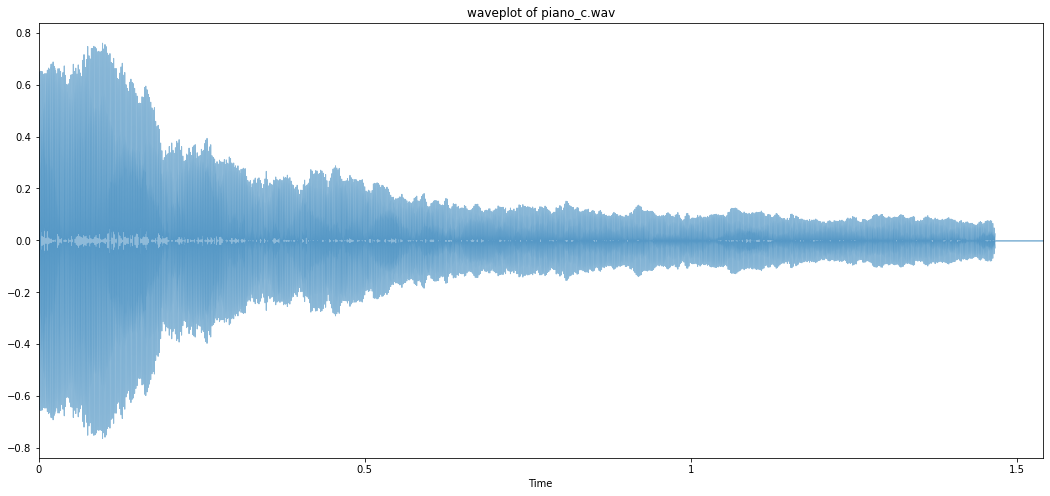

33968
Wall time: 315 ms


In [20]:
%%time
# load audio file
signal, sr = librosa.load(audio_path)
# plot waveform
plt.figure(figsize=(18, 8))
plt.title(f'waveplot of {audio_path}')
librosa.display.waveplot(signal, sr=sr, alpha=0.5)
plt.show()
print(len(signal))

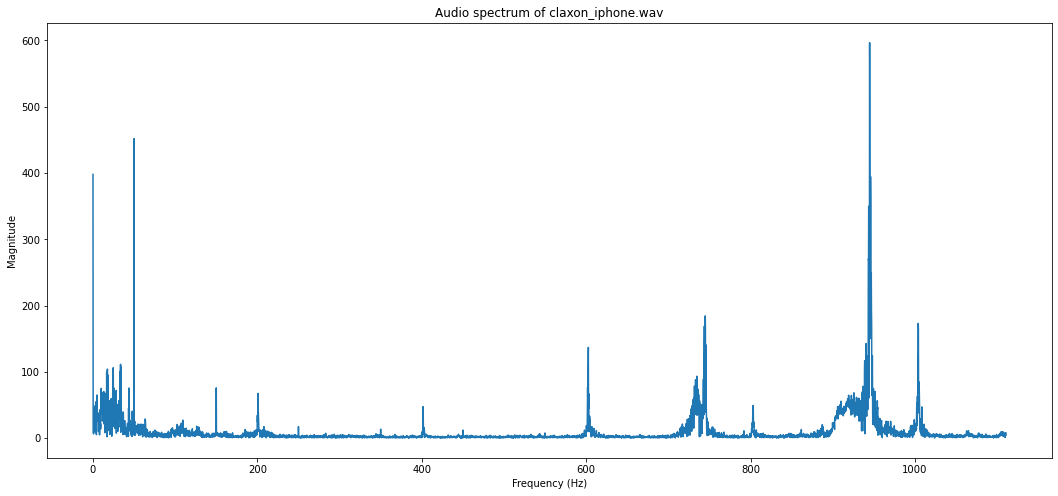

In [13]:
# derive spectrum using FT
ft = sp.fft.fft(signal) #do a Fourier transform using scipy
magnitude = np.absolute(ft) # if we take the absolute value of the ft we get the magnitude.
frequency = np.linspace(0, sr, len(magnitude))

# plot spectrum
plt.figure(figsize=(18, 8))
plt.plot(frequency[:5000], magnitude[:5000]) # magnitude spectrum
plt.title(f'Audio spectrum of {audio_path}')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\31653\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


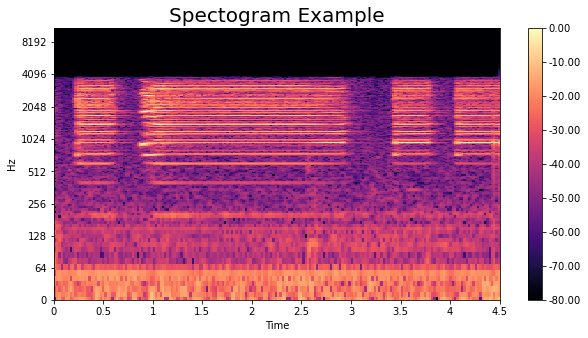

In [14]:
#creating a spectrogram
D = librosa.stft(signal)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

# Energy: Root mean square

In [18]:
#define the Frame Size and Hop length
FRAME_SIZE = 1024
HOP_LENGTH = FRAME_SIZE / 2
print(audio_path)

claxon_iphone.wav


In [23]:
debussy, sr = librosa.load(audio_path)

In [24]:
rms_file = librosa.feature.rms(debussy, frame_length=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

TypeError: 'float' object cannot be interpreted as an integer

In [25]:
def rmse(signal, frame_size, hop_length):
    rmse = []
    
    # calculate rmse for each frame
    for i in range(0, len(signal), hop_length): 
        rmse_current_frame = np.sqrt(sum(signal[i:i+frame_size]**2) / frame_size)
        rmse.append(rmse_current_frame)
    return np.array(rmse)   

In [26]:
rms_debussy1 = rmse(debussy, FRAME_SIZE, HOP_LENGTH)

TypeError: 'float' object cannot be interpreted as an integer